In [67]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


#CSV読み込み
df = pd.read_csv('predict_regression.csv')
df.head()

,date,outcome,difference_ave5days,movement_yesterday,movement_daybefore,nydow
0,2015/1/13,83.03,-0.00896,-0.00704,-0.01319,-0.00952
1,2015/1/14,-218.39,-0.00537,0.00684,-0.00737,-0.00697
2,2015/1/15,77.07,-0.00896,-0.00987,0.00458,-0.01059
3,2015/1/16,99.70,-0.01323,0.01378,-0.01729,-0.00610
4,2015/1/19,-121.01,0.00078,0.00304,0.00810,0.01102


/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


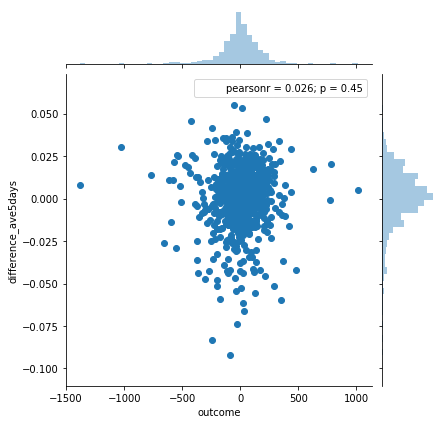

In [64]:
#相関関係を可視化
sns.jointplot('outcome','difference_ave5days' , data = df)
#全掛け合わせを表示
##sns.pairplot(df, kind = 'reg')

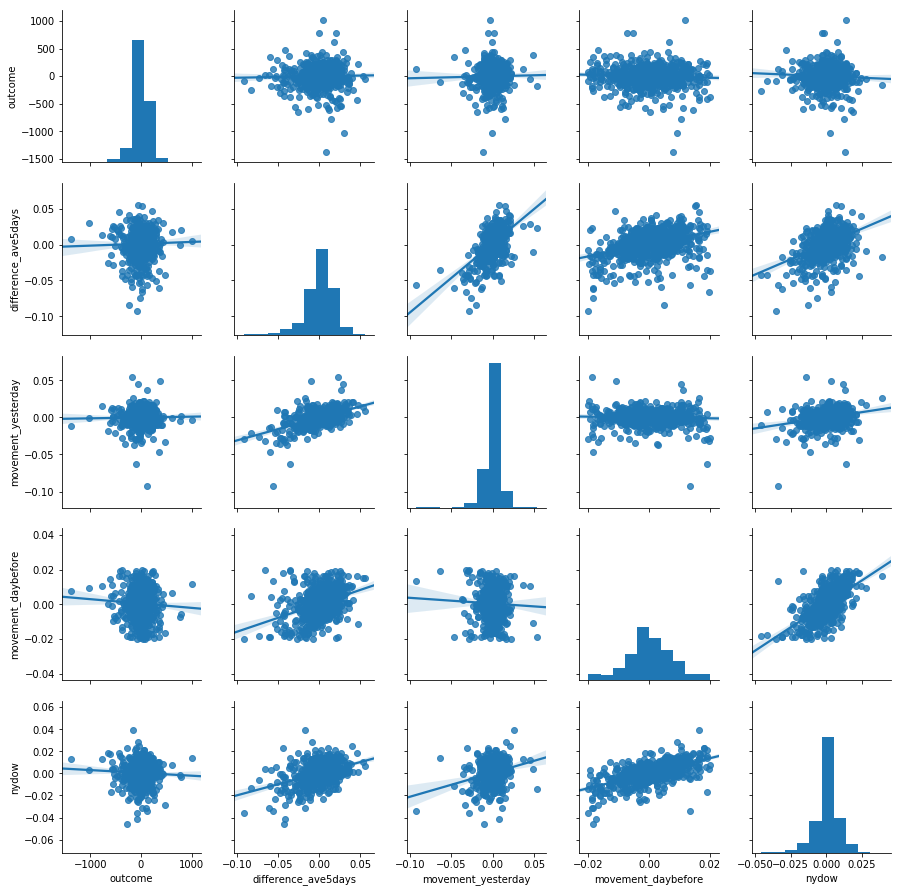

In [51]:
sns.pairplot(df, kind= 'reg', vars = ['outcome','difference_ave5days','movement_yesterday','movement_daybefore','nydow'])

In [52]:
#説明変数
X = df.drop(df.columns[[0, 1]], axis=1)  # df.columns is zero-based pd.Index 
#目的変数
y = df.outcome
model = smf.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.571
Date:                Thu, 23 Aug 2018   Prob (F-statistic):              0.180
Time:                        16:09:26   Log-Likelihood:                -5592.5
No. Observations:                 852   AIC:                         1.119e+04
Df Residuals:                     848   BIC:                         1.121e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
difference_ave5days   697.4663    462.175      1.509      0.132    -209.675    1604.608
movement_yesterday   -148.2626    786.055     -0.189      0.850   -1691.103    1394.578
movement_daybefore  -1342.9072   1096.411     -1.225      0.221   -3494.905     809.091
nydow                -920.9051    943.506     -0.976      0.329   -2772.785     930.975
==============================================================================
Omnibus:                      233.227   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3243.195
Skew:                          -0.836   Prob(JB):                         0.00
Kurtosis:                      12.411   Cond. No.                         4.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#交差項の追加
X['daybefore_nydow'] = X['movement_daybefore'] * X['nydow']
model = smf.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.427
Date:                Thu, 23 Aug 2018   Prob (F-statistic):             0.0339
Time:                        16:09:26   Log-Likelihood:                -5589.6
No. Observations:                 852   AIC:                         1.119e+04
Df Residuals:                     847   BIC:                         1.121e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
difference_ave5days   474.6439    470.045      1.010      0.313    -447.946    1397.234
movement_yesterday     92.9028    790.190      0.118      0.906   -1458.058    1643.864
movement_daybefore  -1122.6701   1097.123     -1.023      0.306   -3276.068    1030.728
nydow               -1045.4837    942.258     -1.110      0.268   -2894.917     803.950
daybefore_nydow     -1.434e+05   5.95e+04     -2.411      0.016    -2.6e+05   -2.67e+04
==============================================================================
Omnibus:                      225.432   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3254.823
Skew:                          -0.781   Prob(JB):                         0.00
Kurtosis:                      12.447   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#学習データとテストデータに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [68]:
from sklearn import linear_model
#学習用データでパラメーター推定
model.fit = (y_train,X_train)
#作成したモデルから予測（学習用、テストモデル使用）
y_test_pred = model.predict(X_test)

ValueError: shapes (639,5) and (213,5) not aligned: 5 (dim 1) != 213 (dim 0)